<a href="https://colab.research.google.com/github/carlottaviappiani/MLPNS_CViappiani/blob/main/Centralimitheorem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Central limit theorem


In [73]:
import pylab as pl
import scipy as sp
import numpy as np
from scipy import stats
import seaborn
seaborn.set_style("darkgrid")
from scipy.optimize import curve_fit,minimize

In [74]:
np.random.seed(456)
#my mean
mymean=100
#choose chi2 as distribution
#fix degree of freedom df at same value as mean
df=mymean #chi2
#if I choose binomial distribution instead I have to dafine degrees of freedom as:
p=0.5
n=mymean/p #mean=n*p binomial

Text(0.5, 0, 'x')

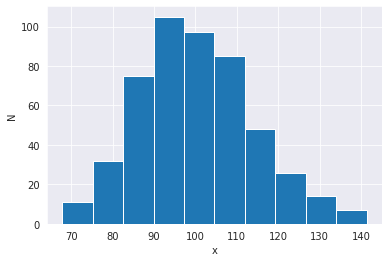

In [75]:
#create dictionary
mydist={}
#create random chisquare distrib. with mean mymean (degree of freedom)
np.random.chisquare(mymean,500)
#histogram of distribution
pl.hist(np.random.chisquare(mymean,500))
pl.ylabel('N')
pl.xlabel('x')

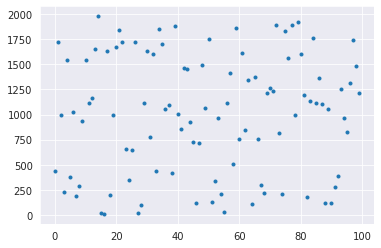

In [76]:
#create 100 distribution(dictionary): create array with dimensions of distribution and then use that to create the 100 distrib. First of all
#we create an array of the dimensions of the distribution:
mysize=(np.random.rand(100)*2000).astype(int)
mysize[mysize<10]=10 #make sure they are all >10 (to make sure they are not too small)
pl.plot(mysize,'.')

1214

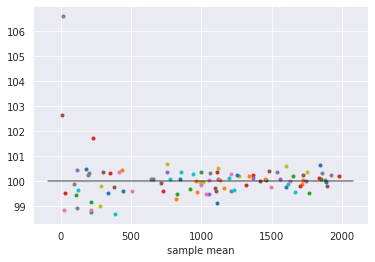

In [77]:
#then we fill the array we just created with random distrib. chi2 with mean mymean 
#(so that each element of the array is indeed a chi2 distribution)

for s in mysize:
  mydist[s]=np.random.chisquare(mymean,size=s)
  #each element of dictionary that I get has **element (**=number that I see in the list if I visualize the array)

#then we calculate the mean of each distrib in the dictionary dist and plot them
ax=pl.figure().add_subplot(111)

for d in mydist.keys():
  ax.plot(d,mydist[d].mean(),'.')

ax.plot(pl.xlim(),[100,100],'k',alpha=0.5)
ax.set_xlabel('sample size')
ax.set_xlabel('sample mean')


#Exercize: do that with other distributions and fit a Gaussian to the distribution we got previously

##Fit a Gaussian to the distribution

In [90]:
#data to fit (mean of elements (array) in the dictionary)
y_data=[]
x_data=[]
for d in mydist.keys():
  y_data[d]=mydist[d].mean()
  x_data[d]=d

#histogram plot of data
hist, bin_edges = np.histogram(x_data)
hist=hist/sum(hist)

#Calculating the Gaussian PDF values given Gaussian parameters and random variable X
def gaus(X,C,X_mean,sigma):
    return C*exp(-(X-X_mean)**2/(2*sigma**2))
#x_hist=np.arange(0,2001,1) if random (here I have data to fit)
#y_hist=np.arange(98,107,0.0045)
mean = sum(x_data*y_data)/sum(y_data)                  
sigma = sum(y_data*(x_data-mean)**2)/sum(y_data) 

#Gaussian least-square fitting process
param,cov_matrix = curve_fit(gaus,x_data,y_data,p0=[max(y_data),mean,sigma],maxfev=5000)
print("Fit parameters: ")
print("=====================================================")
print("max = ", param[0], "+-",np.sqrt(cov_matrix[0,0]))
print("data_mean =", param[1], "+-",np.sqrt(cov_matrix[1,1]))
print("sigma = ", param[2], "+-",np.sqrt(cov_matrix[2,2]))
print("\n")


#Plot of Gaussian curve fitting
fig = pl.figure()
x_data_2=np.linspace(np.min(x_data),np.max(x_data),500)
pl.plot(x_data_2,gaus(x_data_2,*param),'r.:',label='Gaussian fit')
pl.legend()




IndexError: ignored

## Binomial distribution

In [82]:
import pylab as pl
import scipy as sp
import numpy as np
from scipy import stats
import seaborn
seaborn.set_style("darkgrid")
from scipy.optimize import curve_fit,minimize

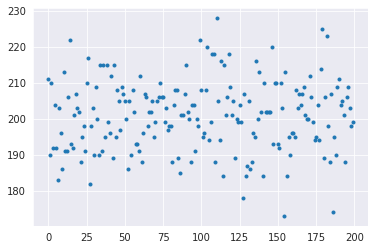

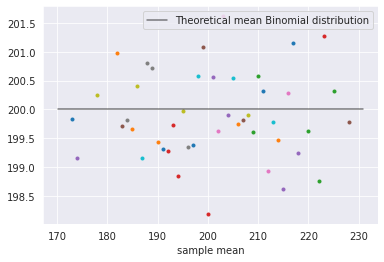

In [83]:
#choose my value of mean for the distribution
mymean=200

#theoretical mean=n*p 
p=0.5
n=mymean/p 

#create dictionary
mydist={}

np.random.binomial(n, p, mymean)
#pl.hist(np.random.binomial(n, p, mymean))
#pl.ylabel('N')
#pl.xlabel('x')

mysize=(np.random.binomial(n, p, mymean)).astype(int)
mysize[mysize<10]=10 #make sure they are all >10 (to make sure they are not too small)
pl.plot(mysize,'.')

for s in mysize:
  mydist[s]=np.random.binomial(n,p,mymean)

#then we calculate the mean of each distrib in the dictionary dist and plot them
ax=pl.figure().add_subplot(111)

for d in mydist.keys():
  ax.plot(d,mydist[d].mean(),'.')

ax.plot(pl.xlim(),[200,200],'k',alpha=0.5,label="Theoretical mean Binomial distribution")
ax.set_xlabel('sample size')
ax.set_xlabel('sample mean')
ax.legend(fontsize=10)

##Gaussian distribution

In [84]:
import pylab as pl
import scipy as sp
import numpy as np
from scipy import stats
import seaborn
seaborn.set_style("darkgrid")
from scipy.optimize import curve_fit,minimize

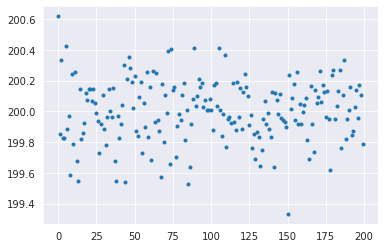

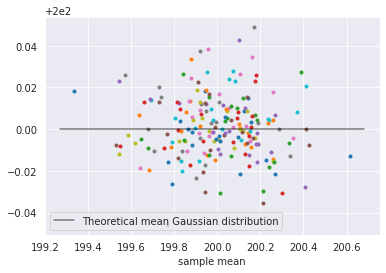

In [85]:
#choose my value of mean for the distribution
mymean=200

#degree of freedom mu=mean
mu=mymean
sigma=0.2

#create dictionary
mydist={}

np.random.normal(mu,sigma,mymean)
#pl.hist(np.random.normal(mu,sigma, mymean))
#pl.ylabel('N')
#pl.xlabel('x')

mysize=(np.random.normal(mu,sigma,mymean))#.astype(int) 
mysize[mysize<10]=10 #make sure every element of dictionary has number of array data >=10 (to make sure they are not too small)
pl.plot(mysize,'.')

for s in mysize:
  mydist[s]=np.random.normal(mu,sigma,mymean)

#then we calculate the mean of each distrib in the dictionary dist and plot them
ax=pl.figure().add_subplot(111)

for d in mydist.keys():
  ax.plot(d,mydist[d].mean(),'.')

ax.plot(pl.xlim(),[200,200],'k',alpha=0.5,label="Theoretical mean Gaussian distribution")
ax.set_xlabel('sample size')
ax.set_xlabel('sample mean')
ax.legend(fontsize=10)

##Poisson distribution

In [86]:
import pylab as pl
import scipy as sp
import numpy as np
from scipy import stats
import seaborn
seaborn.set_style("darkgrid")
from scipy.optimize import curve_fit,minimize

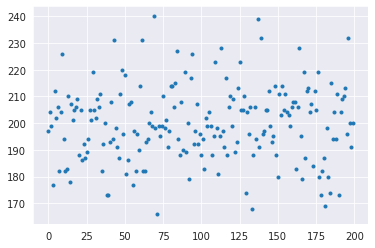

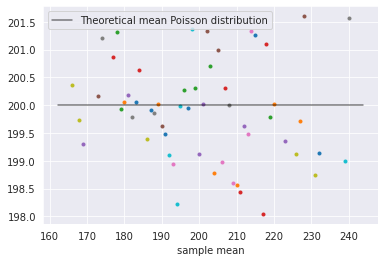

In [87]:
#choose my value of mean for the distribution
mymean=200

#degree of freedom lambda=l=mean
l=mymean


#create dictionary
mydist={}

np.random.poisson(l,mymean)
#pl.hist(np.random.poisson(l,mymean))
#pl.ylabel('N')
#pl.xlabel('x')

mysize=(np.random.poisson(l,mymean))#.astype(int) 
mysize[mysize<10]=10 #make sure every element of dictionary has number of array data >=10 (to make sure they are not too small)
pl.plot(mysize,'.')

for s in mysize:
  mydist[s]=np.random.poisson(l,mymean)

#then we calculate the mean of each distrib in the dictionary dist and plot them
ax=pl.figure().add_subplot(111)

for d in mydist.keys():
  ax.plot(d,mydist[d].mean(),'.')

ax.plot(pl.xlim(),[200,200],'k',alpha=0.5,label="Theoretical mean Poisson distribution")
ax.set_xlabel('sample size')
ax.set_xlabel('sample mean')
ax.legend(fontsize=10)